In [1]:
import os
os.chdir('/Users/lihaohan/Alpha_Research')
import pandas as pd
import numpy as np


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/lihaohan/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/lihaohan/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/lihaohan/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/lihaohan/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
  

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/lihaohan/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/lihaohan/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/lihaohan/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/lihaohan/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
  

AttributeError: _ARRAY_API not found

In [2]:
from Backtest.backtest import Alpha

/Users/lihaohan/Alpha_Research/Backtest/backtest.py:89: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if self.freq is not 'D':


INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [3]:
factor = pd.read_pickle('/Volumes/T7Shield/Factor/factor/FactorZoo/已平滑因子/vov_factor2.pickle')
factor = factor.dropna(how='all')
factor.head()

code,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,873576,873593,873665,873679,873690,873693,873703,873726,873806,873833
date,,,,,,,,,,,,,,,,,,,,,
2018-01-29,0.567301,0.330767,0.508356,0.990840,NaN,NaN,0.578951,0.366159,NaN,0.568642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-30,0.561395,0.327634,0.496462,0.991370,NaN,NaN,0.575908,0.362146,0.634109,0.564414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-31,0.579268,0.365584,0.489207,0.970439,NaN,NaN,0.608651,0.367816,0.630807,0.557403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.577938,0.465239,0.486610,0.958703,NaN,NaN,0.632684,0.387629,0.622258,0.578229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-02,0.594626,0.513098,0.479242,0.940220,NaN,NaN,0.683360,0.380382,0.610750,0.570163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


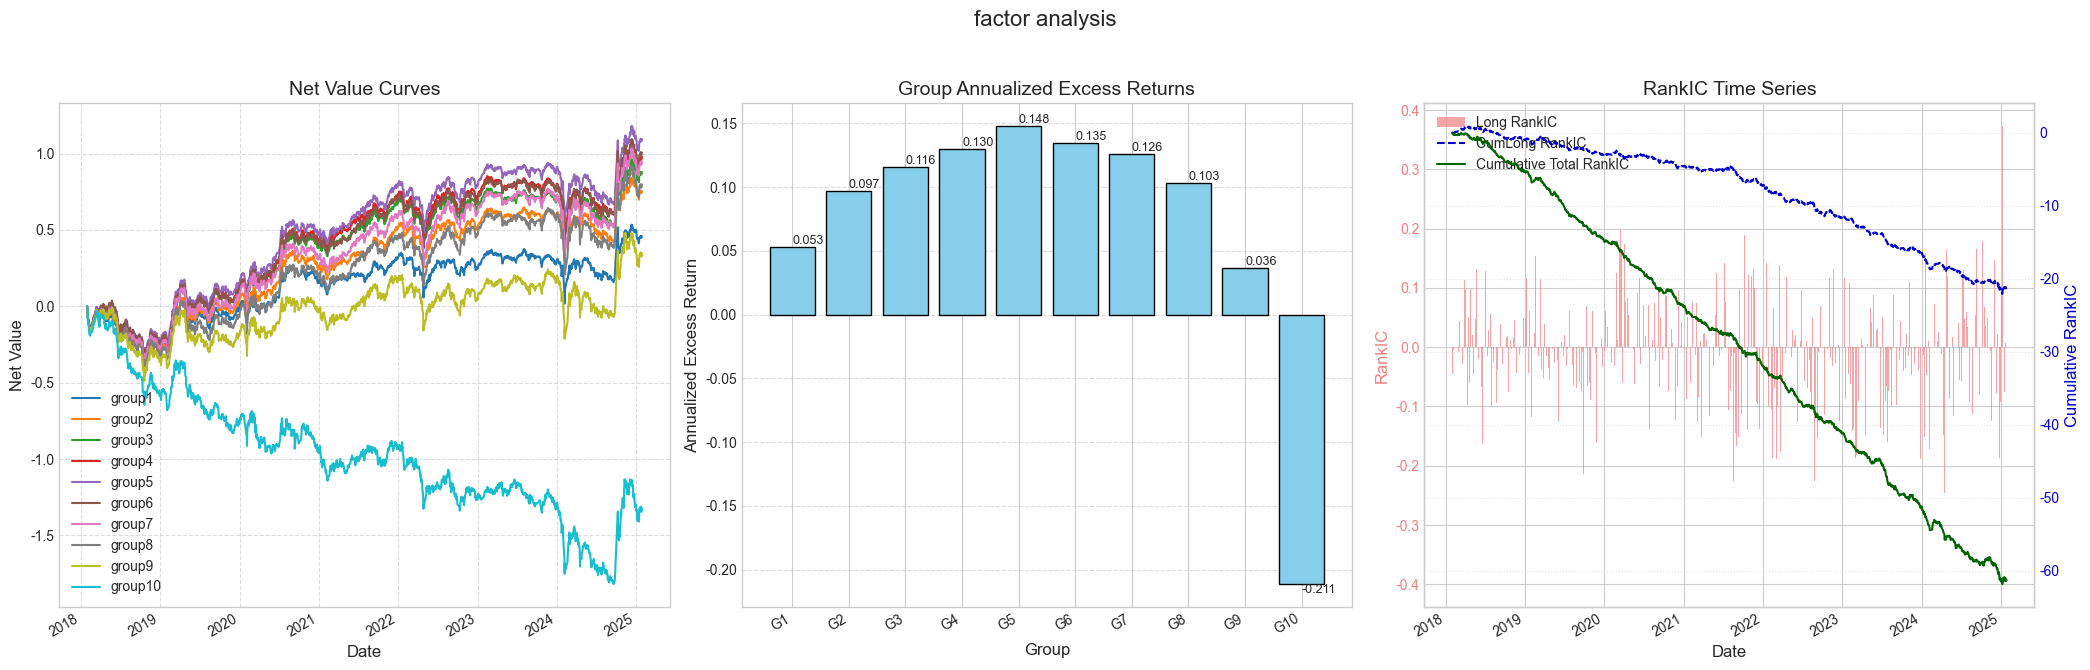

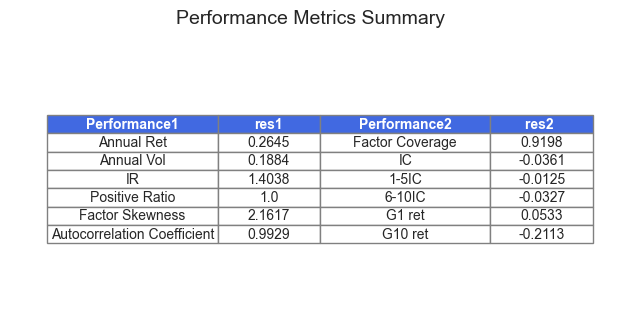

In [4]:
shen = Alpha(freq='D')
shen.set_basic_data()
shen.set_factor_date_as_index(factor)
shen.prepare()
shen.run(
            groups_num=10,
            ilegend=1,
            without_breakpoint=0,
            show_more_than=0.025,
        )

In [5]:
def bt_perf(
        nets: pd.Series,
        rets: pd.Series,
        counts_one_year: 12,
) -> pd.Series:
    '''
    Params:
    ----------
    nets: pd.Series
        净值序列, index为日期
    rets: pd.Series
        收益率序列, index为日期
    counts_one_year: int
        一年内交易了多少次
    
    Returns:
    ----------
    pd.Series
        评价结果包括年化收益率、总收益率、年化波动率、年化夏普、最大回撤率、胜率
    '''
    n_series = nets.copy()
    r_series = rets.copy()
    duration = (n_series.index[-1] - n_series.index[0]).days
    year = duration / 365
    ret_yearly = n_series.iloc[-1] / year
    max_drawdown = -((n_series + 1) / (n_series+1).expanding(1).max() - 1).min()
    vol = np.std(r_series) * (counts_one_year ** 0.5)
    sharpe = ret_yearly / vol
    wins = r_series[r_series > 0]
    win_rate = len(wins) / len(r_series)
    return pd.Series(
        [n_series.iloc[-1], ret_yearly, vol, sharpe, max_drawdown, win_rate],
        index = ['总收益率', '年化收益率', '年化波动率', '信息比率', '最大回撤率', '胜率']
    )

In [6]:
net = shen.group_net_values
ret = shen.group_rets
ret_yearly1 = shen.group1_ret_yearly
ret_yearly10 = shen.group10_ret_yearly

In [7]:
print(ret_yearly1, ret_yearly10)

0.05327879106340894 -0.21134356670678137


In [8]:
long_net = net.group1
long_ret = ret.group1

<Axes: >

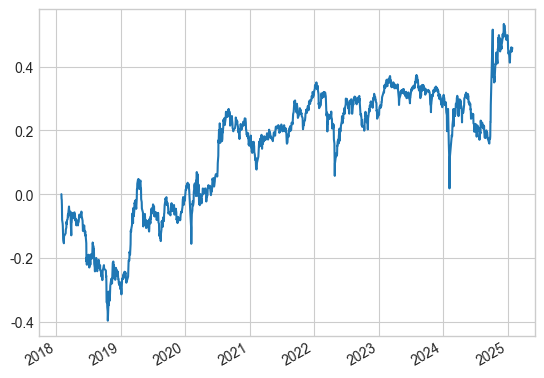

In [9]:
long_net.plot()